<a href="https://colab.research.google.com/github/IdajiliJohnOjochegbe/Credit-Card-Fraud-Detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')



In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Check for class imbalance
print(df['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Exploratory Data Analysis

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

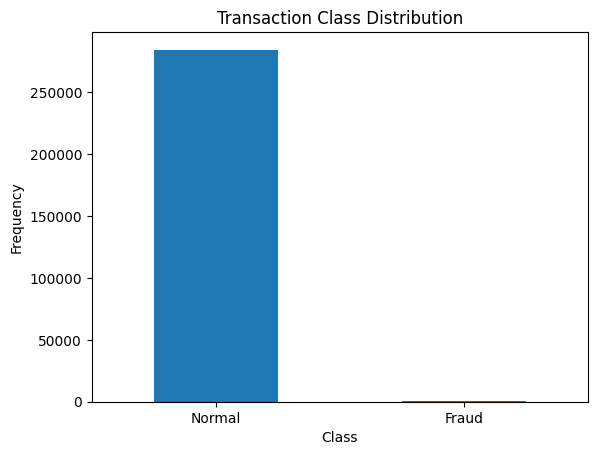

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


# Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Before SMOTE: ", y_train.value_counts())
print("After SMOTE: ", pd.Series(y_train_res).value_counts())


Before SMOTE:  Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE:  Class
0    227451
1    227451
Name: count, dtype: int64


# Model Training and Evaluation

# **Using Logistics Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression for classification
clf = LogisticRegression(random_state=42)
clf.fit(X_train_res, y_train_res)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluation of the classification model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion Matrix:
 [[55401  1463]
 [    8    90]]


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination='auto', random_state=42)
iso_forest.fit(X_train)

# Anomaly predictions on the test set
anomaly_pred = iso_forest.predict(X_test)
# Convert anomaly predictions to binary (1 for anomalies/fraud, 0 for normal)
anomaly_pred = [1 if x == -1 else 0 for x in anomaly_pred]

# Evaluation of the anomaly detection model
print("Anomaly Detection Classification Report:\n", classification_report(y_test, anomaly_pred))
print("Anomaly Detection Confusion Matrix:\n", confusion_matrix(y_test, anomaly_pred))

Anomaly Detection Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.85      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.91      0.53     56962
weighted avg       1.00      0.97      0.98     56962

Anomaly Detection Confusion Matrix:
 [[54979  1885]
 [   15    83]]


# Combined Models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination='auto', random_state=42)
iso_forest.fit(X_train)

# Logistic Regression for classification
clf = LogisticRegression(random_state=42)
clf.fit(X_train_res, y_train_res)

# Anomaly detection on the test set
anomaly_pred = iso_forest.predict(X_test)
anomaly_indices = [i for i, x in enumerate(anomaly_pred) if x == -1]

# Separate the anomalies for further classification
X_anomalies = X_test[anomaly_indices]

# Classification of the detected anomalies
y_anomaly_class_pred = clf.predict(X_anomalies)

# Prepare final predictions array
final_pred = [0] * len(X_test)  # Initialize with all zeros (non-fraud)
for i in anomaly_indices:
    final_pred[i] = 1 if y_anomaly_class_pred[list(anomaly_indices).index(i)] == 1 else 0

# Evaluation of the combined model
print("Combined Model Classification Report:\n", classification_report(y_test, final_pred))
print("Combined Model Confusion Matrix:\n", confusion_matrix(y_test, final_pred))


Combined Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.24      0.85      0.37        98

    accuracy                           1.00     56962
   macro avg       0.62      0.92      0.69     56962
weighted avg       1.00      1.00      1.00     56962

Combined Model Confusion Matrix:
 [[56600   264]
 [   15    83]]


Accuracy: 0.9951
Precision: 0.2392
Recall: 0.8469
F1 Score: 0.3730


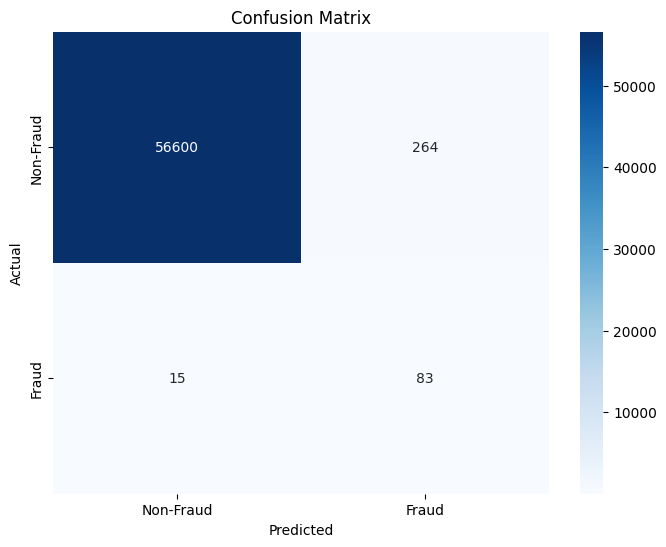

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, final_pred)
precision = precision_score(y_test, final_pred)
recall = recall_score(y_test, final_pred)
f1 = f1_score(y_test, final_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, final_pred)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
